In [ ]:
# default_exp frequency_response

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from importing_modules import *

In [ ]:
%matplotlib inline

-----------------------

# Introduction to Frequency Response Methods: Bode Plots

## Frequency response

Given an LTI system with transfer function: $G(s) = C(sI - A)^{-1}B$

and an input signal: $u(t)=Asin(\omega t)$

Assuming that the system is **asymptotically stable**, it is possible to verify that: 

$$y(t)=A|G(j\omega)|sin(\omega t + \angle G(j\omega) ) $$

This means that the output $y(t)$ converges to a sinusoidal signal that has the **same frequency** of the input, and that has magnitude $A|G(j\omega)|$ and is shifted in phase by $\angle G(j\omega)$.

Note also that this is true independently of the initial state $x_0$. In fact, since the system is asymptotically stable, the effect of the initial state on the output will go to zero.

<tr>
<td> <img src="img/26.freq-response.png" alt="freq-response.png" style="width: 550px;"/> </td>
</tr>

Let's see what this means with our LinearCar:

In [ ]:
from car import *

In [ ]:
# Let's define its initial conditions
x_0 = (0,0)

# no slope terrain
theta = np.radians(0)

# Define the car parameters
m = 1
alpha = 1
beta = 1
gamma = 1
params = (m, alpha, beta, gamma)

# Create the car
car = LinearCar(x_0, params)

# run it!
t0, tf, dt = 0, 30, 0.1
time = np.arange(t0, tf, dt)

w = 1 # rad/s
u = 1*np.sin(w*time)

position = []
velocity = []
time = []
for i, t in enumerate(np.arange(t0, tf, dt)):
    car.step(dt, u[i], theta)
    x_i, y_i, v = car.sensor_i()
    position.append((x_i,y_i)), velocity.append(v)
    time.append(t)

And now we plot it:

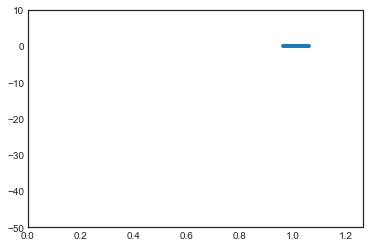

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots();

ax.set_xlim((min(position)[0], max(position)[0]));
ax.set_ylim((-50, 10));
line, = ax.plot([], [], lw=4);

x_range = np.linspace(int(position[0][0]), int(position[-1][0]), num=20)

# animation function. This is called sequentially
def animate(i):    
    x_min, x_max = position[max(0,i-2)][0], position[i][0]
    y_min, y_max = position[max(0,i-2)][1], position[i][1]
    line.set_data([x_min, x_max], [y_min, y_max])
    return (line,)


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=len(time), interval=40, blit=True,
                               repeat_delay=10000, repeat=True);

HTML(anim.to_html5_video())

And if we plot the speed with respect to the input signal:

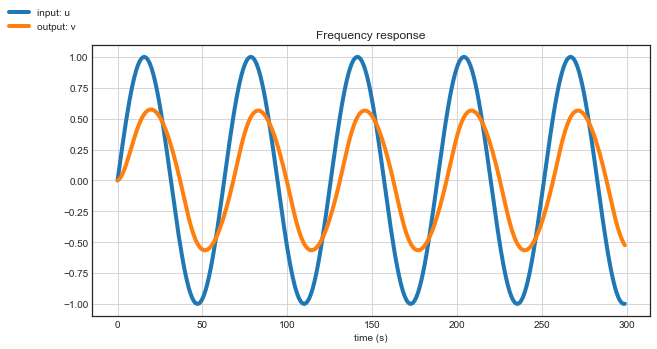

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.plot(u, linewidth=4)
plt.plot(velocity, linewidth=4)
fig.legend(['input: u', 'output: v'], loc='upper left')

plt.title('Frequency response')
plt.xlabel('time (s)')
plt.grid()

### Comments

- **If we know magnitude and phase of $G(j\omega)$, as $\omega$ varies, then effectively we know how the system behaves for all sinusoidal inputs with different driving frequencies.**
- It is possible to experimentally determine $G(j\omega)$ which means that we can also reconstruct the transfer function
- $G(j\omega)$ can be represented graphically through Magnitude and Phase diagrams (each one is a Real Function of the real variable $\omega$:
$$G(j\omega)=|G(j\omega)|e^{j\angle G(j\omega)}$$
- This makes it possible to analyse the gain and the phase shift across the full frequency spectrum


- Finally, as a side observation, note that if we have a sinusoidal input $sin(\omega_0 t)$, the output can be zero only if $G(j\omega_0)=0$. This happens if the T.F. $G(s)$ has a pair of imaginary zeros in $j\omega_0$.

------------------------

## Complex numbers and their representation through magnitude and phase

Complex Numbers are a very popular and frequently used aspect of Mathematics. Composed of a real part and an imaginary part, they are written in the form $\mathit{\mathbf{x + iy}}$. 

- $\mathit{\mathbf{x}}$ denotes the real part and $\mathit{\mathbf{iy}}$ denotes the imaginary part. 
- Complex numbers can be represented on an **Argand Diagram**. 

- An **Argand Diagram** is similar to the **Cartesian Coordinate System** except that the Real axis and Imaginary axis replace the $\mathit{\mathbf{X}}$ and $\mathit{\mathbf{Y}}$ axis respectively which you would usually expect see on the Cartesian system. 
For example:

<tr>
<td> <img src="img/27.complex-numbers.png" alt="27.complex-numbers.png" style="width: 350px;"/> </td>
</tr>

The complex number $\mathit{\mathbf{z = x + iy}}$ can hence be also represented as: $$\large \mathit{\mathbf{|z|e^{j\angle z}}}$$

- The Modulus of the Complex Number gives the straight line distance from the origin to the point: $\mathit{\mathbf{|z|=\sqrt{x^2+y^2}}}$
- The Argument gives the angle between the line representing the complex number and the positive real axis: $\angle z = arctan \frac{y}{x}$



<tr>
<td> <img src="img/28.complex_magnitude-argument.png" alt="28.complex_magnitude-argument" style="width: 450px;"/> </td>
</tr>

------------------------------

## Frequency Response and Bode Plots

The objective is that of analysing the gain and the phase shift across the full frequency spectrum.

Let's now suppose that we have one simple system:

<tr>
<td> <img src="img/29.simple-system.png" alt="29.simple-system" style="width: 450px;"/> </td>
</tr>

When we have $u(t)=\sin(0.5t)$, the output of this system is:

$$y(t)=2\sin(0.5t)+\int \sin(0.5t)dt = 2\sin(0.5t) - \frac{1}{0.5}\cos(0.5t)$$

Since (Trigonometry Identity):
> $a \sin x + b \cos x = \sqrt{a^2+b^2}\sin(x+\phi)$, where $\phi=\tan^{-1}\frac{b}{a}$

We can then write:
$$y(t)=2\sin(0.5t)+\int \sin(0.5t)dt = 2\sin(0.5t) - 2\cos(0.5t) = \sqrt{8} \sin(0.5t + \tan^{-1}(-1)) \approx 2.83 \sin(0.5t-0.785)$$



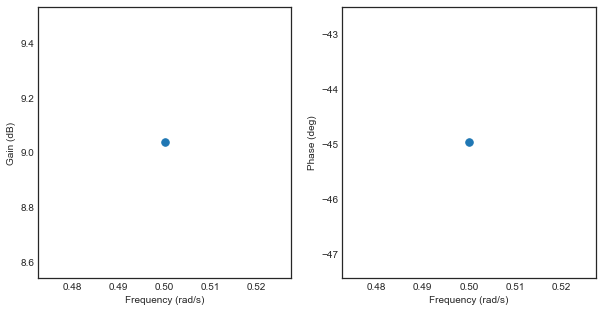

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5));

axs[0].plot(0.5, 20*np.log10(2.83), marker='.', markersize=15)
axs[0].set_xlabel('Frequency (rad/s)')
axs[0].set_ylabel('Gain (dB)');

axs[1].plot(0.5, np.degrees(-0.785), marker='.', markersize=15)
axs[1].set_xlabel('Frequency (rad/s)')
axs[1].set_ylabel('Phase (deg)');

We can manually calculate the frequency response for all possible values of $\omega$:

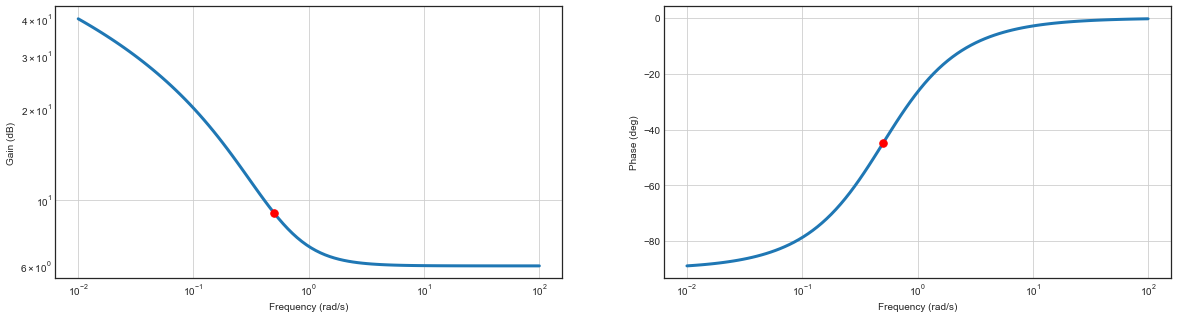

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5));

ws = np.logspace(-2, 2, 100) # logspace sets the exponents

gain, phase = [], []
for w in ws:
    # y_t = np.sqrt(2**2+1/w**2) * sin(w*t + np.atan2(-1/w, 2))
    gain.append(np.sqrt(2**2 + (1/w)**2))
    phase.append(np.arctan2(-1/w, 2))
    
    
axs[0].plot(ws, 20*np.log10(gain), linewidth=3)
axs[0].plot(0.5, 20*np.log10(2.83), marker='.', markersize=15, color='red')    
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].grid('log')
axs[0].set_xlabel('Frequency (rad/s)')
axs[0].set_ylabel('Gain (dB)');

axs[1].plot(ws, np.degrees(phase), linewidth=3)
axs[1].plot(0.5, np.degrees(-0.785), marker='.', markersize=15, color='red')    
axs[1].set_xscale('log')
axs[1].grid('log')
axs[1].set_xlabel('Frequency (rad/s)')
axs[1].set_ylabel('Phase (deg)');

We can obtain the result using directly the transfer function.
The previous system can be written as:

$$G(s)= \bigg (2 + \frac{1}{s} \bigg ) = \frac{2s+1}{s}$$

which means:

$$y(t) = \frac{2*s+1}{s} u(t) $$

Recall that: $s=\sigma + j\omega$

And that when we calculate the frequency response we are interested in the state state response, once all the transients have died out (or in other words, when $\sigma=0$.

So for steady state: $s=j\omega$

When can then calculate state state gains and phases directly substituting in the transfer functions $s=j\omega$:

$$\frac{2*s+1}{s} \big |_{s=j\omega} \rightarrow \frac{2*j\omega+1}{j\omega} = 2-\frac{1}{\omega}j$$

We can then plot it on the Real-Imaginary axis.

And for $\omega=0.5$ 

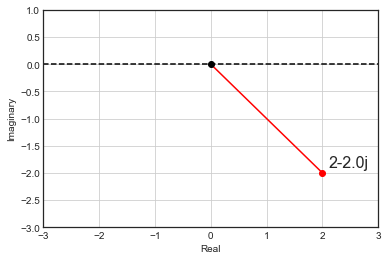

In [ ]:
fig = plt.figure()

w = 0.5

def plot_imre(w, display_text=1):
    plt.plot([-3, 6], [0, 0], color='black', linestyle='--') # real axis
    plt.plot([0, 2], [0, -1/w], color='red') # vector
    plt.plot(0, 0, marker='.', markersize=12, color='black');
    plt.plot(2, -1/w, marker='.', markersize=12, color='red');
    if display_text: plt.text(2+0.1, -1/w+0.1, '2-{:.1f}j'.format(1/w), size=16) # add a text


plot_imre(w)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axis([-3, 3, -3, 1])
plt.grid()

- The length of the line is the **Gain** of the system
- The angle between the line and the positive real line is the **Phase**.

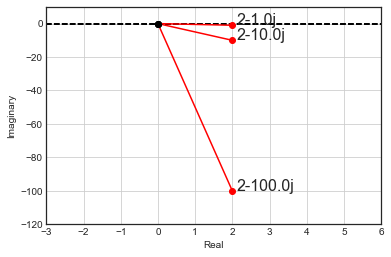

In [ ]:
fig = plt.figure()
ws = np.logspace(0.001, 10, 100)

ws = [0.01, 0.1, 1]
for w in ws:
    plot_imre(w)
    
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axis([-3, 6, -120, 10])
plt.grid()

The real part never changes.

**Gain**
- As $\omega$ decreases, the Gain increases ($\inf$ for $\omega=0$)
- As $\omega$ increases, the Gain decreases (2 for $\omega=\inf$)

**Phase**

- As $\omega$ decreases, the Gain increases ($-90^o$ for $\omega=0$)
- As $\omega$ increases, the Phase decreases (0 for $\omega=\inf$)




------------------

### Let's be more formal

- The transfer function of linear systems are polynomial fractions in $s$
- It is always possible to factor polynomials in terms of their roots (zeros and poles)
- Each polynomial is the product of first-order or second-order (potentially with multiplicity $>$ 1)
- To build the frequency response of the system is useful to have simple rules to represent each term
- We can leverage the properties of the logarithms: the logarithm of a product is equal to a sum of logarithms:
     - $ \log(AB) = \log(A)+\log(B) $
     - $ \log(A/B) = \log(A)-\log(B)$
     - $ \log(y^x) = x\log(y)$

### Magnitude and Phase

$$\large G(s) = \frac{(s-z_1)(s-z_2)...}{(s-p_1)(s-p_2)...}$$ 

$$\Downarrow$$

$$\large G(jw) = \frac{|j\omega-z_1|e^{j\angle j\omega -z_1} |j\omega-z_2|e^{j\angle j\omega -z_2} ...}{|j\omega-p_1|e^{j\angle j\omega -p_1} |j\omega-p_2|e^{j\angle j\omega -p_2} ...} $$ 

$$\Downarrow$$ 

$$\large G(jw) = \frac{|j\omega-z_1||j\omega-z_2|...e^{j(\angle j\omega -z_1 + \angle j\omega -z_2 + ...)}}{|j\omega-p_1||j\omega-p_2|...e^{j(\angle j\omega -p_1 + \angle j\omega -p_2 + ...)}} $$

and:

$$\large |G(jw)| = \frac{|j\omega-z_1||j\omega-z_2|...}{|j\omega-p_1||j\omega-p_2|...}$$

$$\large \angle  G(jw)| = +\angle (j\omega -z_1)+\angle (j\omega -z_2)+ ... -\angle (j\omega -p_1)-\angle (j\omega -p_2) - ...$$



---------------------

### Bode Amplitude Plot

- In the amplitude plot, it is convenient to report the value of the magnitude in _decibel_ or _dB_.
- By convention, the dB value of a positive quantity $x$ is: $20\log_{10}(x)$.
- This means: $|G(j\omega)|_{dB}=20log|G(j\omega)|$

- Note that when:
   - $|G(j\omega)|_{dB} > 0 \rightarrow |G(j\omega)| > 1$
   - $|G(j\omega)|_{dB} < 0 \rightarrow |G(j\omega)| < 1$
   - $|G(j\omega)|_{dB} = 0 \rightarrow |G(j\omega)| = 1$
   
   
When we use dB things become simpler:

$\large |G(jw)| = \frac{|j\omega-z_1||j\omega-z_2|...}{|j\omega-p_1||j\omega-p_2|...}$ $\Rightarrow$

$$\large |G(j\omega)|_{dB}=20\log|G(j\omega)| = 20\log(|j\omega-z_1|) + 20\log(|j\omega-z_2|) + ... \\
               \large - 20\log(|j\omega-p_1|) - 20\log(|j\omega-p_2|) ...$$



- It is convenient to use a logarithmic scale for the $w$-axis. 
- Logarithmic scales are useful when plotting functions that vary over many orders of magnitude.
- One term we will use in our discussion of frequency response plots is “decade”. A decade change in frequency is a factor of ten. So, for example, 1 kHz is a decade above 100 Hz and a decade below 10 kHz.

### Sketching Bode Plots 

- Being able to quickly draw Bode plots is important
   - Intuitive understanding how poles and zeros affect the frequency response
   - Estimate the transfer function looking at the frequency response (e.g. estimate of the transfer function from the output of a frequency sweep that we are providing to the system)
   

**Recall**

- Given a transfer function $G(s)$ we can obtain the (steady state) frequency response setting $s=j\omega \rightarrow G(j\omega)$

- Remember also that $G(j\omega) = \text{real} + \text{imag}j $

- If we plot it on the Real-Imag diagram:

<tr>
<td> <img src="img/37.H_jw_text.png" alt="37.H_jw" style="width: 350px;"/> </td>
</tr>

- Gain: $\sqrt{\text{real}^2 + \text{img}^2} = |H(j\omega)|$
- Phase: $atan2(\text{img}, \text{real}) = arg(H(j\omega)) = \angle H(j\omega)$

- The sign of the phase is determined based on which side of the real line it appears

<tr>
<td> <img src="img/38.H_jw_multiple_points.png" alt="38.H_jw" style="width: 350px;"/> </td>
</tr>

## Representing the simplest transfer function on a Bode Plot

- $G(s) = K$
- where $K$ can be positive of negative

We apply the definition
- Gain = $|G(j\omega)| = |K| = \text{positive K}$
- Phase = $\text{atan2}(img, real)= \text{atan2}(0, K)$
   - $K$ can be positive or negative, 
   - For $K > 0$, Phase = $0$,
   - For $K < 0$, Phase = $180^o=-180^o$, but traditionally use $-180^o$
      - if we use $\text{atan2}$ we already keep track of the sign.

<tr>
<td> <img src="img/39.H_jw_K.png" alt="39.H_jw_K.png" style="width: 450px;"/> </td>
</tr>


### Represent on a Bode Plot

**Gain**
- We need to remember to convert the gain to dB: $|H(j\omega)| = 20\log_{10}|K|$
- Then it is just a constant for all frequencies, so it is a straight line

**Phase**
- Constant for all frequencies
- $K>0$, Phase = $0^o$
- $K<0$, Phase = $-180^o$


<tr>
    <td> <img src="img/40.Bode_H_jw_K.png" alt="40.Bode_H_jw_K" style="width: 750px;"/> </td>
</tr>

**What is happening in time?**

The system that we are considering is:

<tr>
    <td> <img src="img/41.sinwt.png" alt="41.sinwt" style="width: 550px;"/> </td>
</tr>


- Input is $\sin(\omega t)$
- Output is $K\sin(\omega t)$, which is a sinusoid with the same frequency, but scaled by $K$ (and shifted in phase if $K<0$.

<tr>
    <td> <img src="img/42.sinwt_shift.png" alt="42.sinwt_shift" style="width: 450px;"/> </td>
</tr>


------------------------

## Bode Plot of the Integrator

Consider a system that has a single pole in the origin. The steady-state frequency-response is determined by letting $s \rightarrow j\omega$:

$$G(s) = \frac{1}{s} \Rightarrow G(j\omega)=\frac{1}{j\omega} = -\frac{1}{w}j$$

- Real component is 0
- Imaginary component is $-\frac{1}{w}$

- Gain = $|G(j\omega)| = \big | -\frac{1}{w}j \big | = \frac{1}{\omega}$: 
- Phase = $\arg \big(-\frac{1}{w}, 0 \big) = -90^o$ 

<tr>
    <td> <img src="img/43.H_jw_integrator_bode.png" alt="43.H_jw_integrator_bode" style="width: 350px;"/> </td>
</tr>


Another way to look at this is through a block diagram
<tr>
    <td> <img src="img/44.H_jw_integrator_time_one_s.png" alt="44.H_jw_integrator_time" style="width: 550px;"/> </td>
</tr>



- And if we plot it, we see that the resulting signal has a -90 deg phase shift:

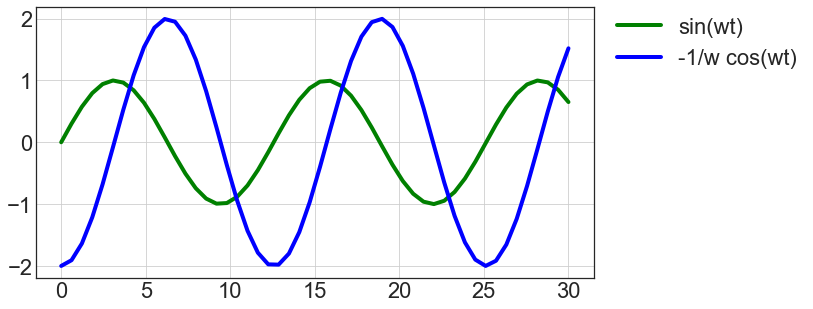

In [ ]:
fig = plt.figure(figsize=(10,5))

t = np.linspace(0, 30, 50)
w = 0.5

plt.plot(t, np.sin(w*t), color = 'green', label='sin(wt)', linewidth=4)
plt.plot(t, -1/w*np.cos(w*t), color = 'blue', label='-1/w cos(wt)', linewidth=4)



rc('font', **{'size':22})
plt.grid()
plt.legend(loc="lower right", bbox_to_anchor=(1.4,0.7));

Let's se what the Bode plot looks like:

- Gain = $\large |G(j\omega)| = \big | -\frac{1}{w}j \big | = \frac{1}{\omega}$: 

   - when $\omega = 1 \; \text{rad/s}$, then gain = 1, $\rightarrow 20\log_{10}1=0 \text{dB}$
   - when $\omega = 10 \; \text{rad/s}$, then gain = 1/10, $\rightarrow 20\log_{10}1=-20 \text{dB}$
   - $|G(j\omega)|_{dB}=20\log\big|\frac{1}{j\omega}\big| = -20\log(\omega)$
   - Given that we are using a logarithmic scale on both axis, this corresponds to a straight line with a -20dB slope every "decade".



- Phase = $\arg \big(-\frac{1}{w}, 0 \big) = -90^o$ at all frequencies



Let's plot it!

We will use the [Python Control Systems](https://web.math.princeton.edu/~cwrowley/python-control/index.html) Library for this.

> The Python Control Systems Library is a Python module that implements basic operations for analysis and design of feedback control systems.

In [ ]:
import control

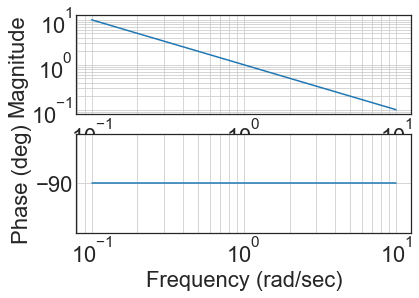

In [ ]:
control.bode_plot(control.tf([1], [1, 0]));

### What about a zero?

- $G(s)=s$

- It is easy to calculate this from what you know already.

--------------------

## Frequency Response of Simple Poles and Zeros

### Transfer function with a single real pole 

- Given a transfer function G(S), re-write the transfer function in the Bode form: 
   - ex. 
       - $\large G(s)=\frac{1}{s+1} \Rightarrow \frac{1}{1+\frac{s}{w_0}}$
       - we call $w_0$ "break frequency" or "corner frequency"
   - Sometime you also see it written as:
       - $\large G(s)=\frac{w_0}{s+w_0} = \frac{1}{1+\tau s}$
       - where $\tau = \frac{1}{w_0}$ is called _Time constant_
   - All these representations are equivalent
   

- To be clear:
  - A real pole has an effect on the frequency response
 

<table style='margin: 0 auto' rules=none>
<tr>
    <td> <img src="img/44.1.real-pole-1.png" alt="45.H_jw_real_pole_bode_0" style="width: 250px;"/> 
    <td> <img src="img/44.2.real-pole-2.png" alt="45.H_jw_real_pole_bode_0" style="width: 250px;"/> </td>
</tr> 
</table>    

Now, given a transfer function with a single real plot:

$\large G(s)= \frac{1}{1+\frac{s}{w_0}}$ $\large \xrightarrow{Set\; s=j\omega}$ $\large\frac{1}{1+\frac{j\omega}{w_0}}$

We are trying to separate the real part and the imaginary part:

$$\large\frac{1}{1+\frac{j\omega}{w_0}} = \frac{1}{1+j\frac{\omega}{w_0}} \frac{1-j\frac{\omega}{w_0}}{1-j\frac{\omega}{w_0}} = \frac{1-j\frac{\omega}{w_0}}{1+\frac{\omega^2}{w_0^2}}$$

_Note: $1-j\frac{\omega}{w_0}$ is the complex conjugate of $1+j\frac{\omega}{w_0}$_

- Real part = $\large \frac{1}{1+\frac{\omega^2}{\omega_0^2}}$

- Imaginary part = $\large \frac{-\frac{\omega}{\omega_0}}{1+\frac{\omega^2}{\omega_0^2}}$

And now we can solve for the gain and phase as we did before:

- Gain: $$ 20\log_{10}\big | H(j\omega) \big | = \sqrt{ real^2 + img^2 } = \sqrt{ \frac{1}{1+\frac{\omega^2}{\omega_0^2}} } \xrightarrow{in \; \text{dB}} -20\log_{10}\bigg( \sqrt{1+\frac{\omega^2}{\omega_0^2}} \bigg)$$


- Phase: $$\arctan\frac{\text{img}}{\text{real}}=\arctan\frac{-w}{w_0}$$


And now we can plot them:

- case 1: $w \ll w_0 \rightarrow \frac{\omega^2}{\omega_0^2} \rightarrow 0$, 
    - Gain: $-20\log_{10} = 0\; \text{dB}$
    - Phase: $\arctan(0) = 0\; \text{degrees}$
    
    
<tr>
    <td> <img src="img/45.H_jw_real_pole_bode_0.png" alt="45.H_jw_real_pole_bode_0" style="width: 550px;"/> </td>
</tr>    
    

- case 2: $w = w_0 \rightarrow \frac{\omega^2}{\omega_0^2} = 1$, 
    - Gain: $-20\log_{10}\sqrt{2} = -3 \; \text{dB}$
    - Phase: $\arctan(-1) = -45\; \text{degrees}$
    
    
<tr>
    <td> <img src="img/46.H_jw_real_pole_bode_1_1.png" alt="46.H_jw_real_pole_bode_1.png" style="width: 550px;"/> </td>
</tr>    
    

- case 3: $w \gg w_0$, 
    - The term $\frac{\omega^2}{\omega_o^2}$ dominates the gain equation
    - Gain: $-20\log_{10}\frac{\omega}{\omega_o}$
       - Every time $\omega$ gets 10 times bigger, there is a drop in gain of -20 dB
       - $-20 \; \text{dB}/\text{decade}$ slope and intercepts 0 at $\omega_0$
    - Phase: $\arctan(-\frac{\omega}{\omega_o})=\arctan(\inf) = -90\; \text{degrees}$
    
    
<tr>
    <td> <img src="img/47.H_jw_real_pole_bode_2.png" alt="47.H_jw_real_pole_bode_2.png" style="width: 550px;"/> </td>
</tr>    
    
- This is called the asymptotic Bode plot, which is an approximation of the actual plot.

**What does the actual Bode plot look like?**

<tr>
    <td> <img src="img/48.H_jw_real_pole_bode_actual.png" alt="48.H_jw_real_pole_bode_actual.png" style="width: 550px;"/> </td>
</tr>    

And for this reason, sometimes we use a different approximation of the phase:

<tr>
    <td> <img src="img/49.H_jw_real_pole_bode_2_v2.png" alt="48.H_jw_real_pole_bode_actual.png" style="width: 550px;"/> </td>
</tr>    

### Transfer function with a single real zero

- $G(s) = s + z$

- It is easy from what we know already

- One way to do it is to reshape it as: 
   $$G(s) = s + z = \frac{1}{\frac{1}{s+z}} = \frac{1}{\frac{1}{1+\frac{s}{w_0}}} = 1 + \frac{s}{w_0}$$

- And now we can simply use the property of the logarithm: 
  - _real zero_ is _- real pole_ when plotted on a log-log Bode plot.
 
- Gain slops up at 20 dB/decade (at $w_0$)
- Phase goes from 0 to 90 degrees.

### Summary

- Write the transfer function as: $\frac{1}{1+\frac{s}{w_0}}$ (pole) or as $1 + \frac{s}{w_0}$ (zero)
- Find the break frequency $w_0$ on the log-log Bode plot
- Gain: find and draw the two asymptotes (0 dB until $w_0$, then -20dB/decade (pole) or 20dB/decade (zero))
- Phase: draw the two asymptotes (0 until $w_0$, then -90 deg (pole), 90 deg (zero)
     - Optional: use the better approximation

**One more comment:**

- If you have a $G(s)=\frac{1}{s+4}$ you can always refactor it to the form we would like:
$$G(s)=\frac{1}{s+4} = \frac{1}{4}\frac{1}{1+\frac{s}{4}}$$
- $\frac{1}{4}$ is the gain, and the break frequency $w_0=4$ rad/s

------------------------------

### Transfer function with a pair of complex poles / zeros 

Let's now consider a transfer function of the form:

$$H(s) = \frac{\omega_o^2}{s^2+2\xi\omega_o s+\omega_o^2}$$

The roots of the denominator (the poles) are:

$$s=-\xi\omega_o \pm \omega_o\sqrt{\xi^2-1}$$

- $w_o$ is the break frequency
- $\xi$ dumping ratio 
- if $\xi > 1$, the second-order response has two simple real poles and we know how to deal with that already.
- if $0<\xi < 1$, we have stable complex-conjugatee pole pairs.

First, like we did before, we want to manipulate the form to bring it to the Bode form:

$$H(s) = \frac{1}{\frac{s^2}{\omega_o^2}+2\xi\frac{\omega_o}{\omega_o^2} s+ \frac{\omega_o^2}{\omega_o^2}} = \frac{1}{\frac{s^2}{\omega_o^2}+2\frac{\xi}{\omega_o} s+ 1} $$

Second, we substitute $s=j\omega$ and solve for the real and img parts:

$$H(j\omega) = \frac{1}{-\frac{\omega^2}{\omega_o^2}+2j\xi\frac{\omega}{\omega_o} + 1}$$ 



- Real = $\frac{ 1 - \big(\frac{w}{w_0}\big)^2}{ \bigg[1 - \big(\frac{w}{w_0}\big)^2 \bigg]^2 + \bigg[2\xi \frac{w}{w_0} \bigg]^2}$


- Imaginary = $\frac{- 2\xi \frac{w}{w_0}}{ \bigg[1 - \big(\frac{w}{w_0}\big)^2 \bigg]^2 + \bigg[2\xi \frac{w}{w_0} \bigg]^2}j$


We can use these to estimate the Gain and Phase.

- Case 1: $w \ll w_0$,
   - $\frac{w}{w_0}$ is very small $\Rightarrow$ Real = 1, Img = 0
   - $|H(j\omega)|_{dB} = 20\log(1) = 0$ dB
   - $\arg H(j\omega) = \arctan\frac{0}{1} = 0$ deg
   
   
   
<tr>
    <td> <img src="img/50.H_jw_complex_pole_bode_1.png" alt="50.H_jw_complex_pole_bode" style="width: 550px;"/> </td>
</tr>       


- Case 2: $w \gg w_0$,
   - $1 - \big( \frac{w}{w_0} \big)^2 \approx - \big( \frac{w}{w_0} \big)^2$ $\Rightarrow$ Real = $-\big( \frac{w}{w_0} \big)^{-2}$, Img = $-2\xi \big( \frac{w}{w_0} \big)^{-3}$
   - $|H(j\omega)|_{dB} = 20\log\big( \frac{w}{w_0} \big)^{-2} = -40\log(\frac{w}{w_0})$ dB
       - Note that the real component dominates (there is a square) over the imaginary component
       - -40 dB/decade drop in gain
   - $\arg H(j\omega) = \arctan2 \big(  -2\xi \big( \frac{w}{w_0} \big)^{-3}, -\big( \frac{w}{w_0} \big)^{-2}   \big) = -180$ deg
       - This is because both real and imaginary components are negative and the imaginary component goes to zero faster than the real component.
   
   
   
<tr>
    <td> <img src="img/51.H_jw_complex_pole_bode_w_gg_w0_1.png" alt="51.H_jw_complex_pole_bode_w_gg_w0.png" style="width: 550px;"/> </td>
</tr>       



-Case 3: $w = w_0$,
   - $\frac{w}{w_0} = 1$, Real = 0, Img = $-\frac{1}{2\xi}$
   - $|H(j\omega)|_{dB} = 20\log_{10}(\frac{1}{2\xi})$ dB = $-20\log_{10}(2\xi)$ dB
       - Strongly depends on the parameter $\xi$, the _damping ratio.
       - When $\xi=0.5 \rightarrow -20\log_{10}(1)=0$dB (no peak)
       - When $\xi > 0.5$ then the peak goes slightly down at $w_0$
       - When $\xi < 0.5$ peak of magnitude $-20\log_{10}(2\xi)$
       - When $\xi = 0$ (no dumping) peak goes to $\inf$
       - -40 dB/decade drop in gain
   - $\arg H(j\omega) = \arctan(\inf) = -90$ deg  (remember the quadrant)
       - The slope of the line however changes as a function of $\xi$
   
In case $\xi = 0.3$:

<tr>
    <td> <img src="img/52.H_jw_complex_pole_bode_w_eq_w0_1.png" alt="52.H_jw_complex_pole_bode_w_eq_w0.png" style="width: 550px;"/> </td>
</tr>       




**How does the actual plot look like?**
<tr>
    <td> <img src="img/52.H_jw_complex_pole_bode_w_eq_w0_actual_1.png" alt="52.H_jw_complex_pole_bode_w_eq_w0_actual.png" style="width: 550px;"/> </td>
</tr>       

- Remember: - This is still an approximation!

To do a better approximation of the phase, sometime we identify $w_0^- = \frac{w_0}{5^\xi}, w_0^+ = w_05^\xi$ and we connect them with a straight line.

Here is a more accurate representation of the Bode plots for a pair of complex poles and how their response changes with $\xi$.

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/34.complex-poles-amplitude-corrected.png" alt="34.complex-poles-amplitude-corrected" style="width: 450px;"/> </td>
<td> <img src="img/36.phase-complex-roots.png" alt="36.phase-complex-roots" style="width: 450px;"/> </td>
</tr>
</table>

**Transfer function with a pair of complex zeros**
- The frequency response of complex zeros can be obtained from what we know already
- Reflection of the response of a pole about the horizontal axis.


### Final comments

- Drawing Body plots is easy once we understand the key rules
- Makes it possible to understand how adding poles/zeros changes the frequency response of the system
- Really useful when desigining controllers or filters

------------------------

### OK, really the final comment - Bode plot of a delay

The transfer function of a delay is $G(s)=e^{-s\tau}$.

The frequency response $G(j\omega)=e^{-j\omega\tau}$ is already a phasor!

$$|e^{-j\omega\tau}| = 1$$
$$\angle e^{-j\omega\tau} = -\omega \tau$$

- A delay $\tau$ introduces a phase shift proportional to the delay and to the frequency.

----------------------------------------